## Introduction
For this assignment, we will construct a cross validated linear regression model that predicts the weight of a passenger vehicle.

The data set is sourced from the UC Irvine machine learning archive, comprised of 205 observations and 26 attributes. The curb-weight variable will serve as the response variable for regression model. The explanatory variables may be chosen from are as follows: height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg. All other attributes contained within the data set should be ignored.

- Step1: Exploratory Data Analysis. Including reading the dataset, checking for missing values, and exploring potential exploratory variables to be used. 
- Step2: Regression Model Construction. Including choosing the exploratory variables, separating the response variable and splitting data via scikit-learn. 
- Step3: Regression Model Evaluation. Including assigning the regression model, calculating the r-square values, and concluding a preferred model. 

## Exploratory Data Analysis
- Load the provided M2_Data.csv file to DAV 6150 Github Repository. Read the data set from Github repository and load it into a Pandas dataframe. 

In [5]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. 
# this data set contains information related to automobile models
filename = "https://raw.githubusercontent.com/nananov/DAV-6150/master/M2_Data.csv"
df = pd.read_csv(filename, header=None)

# 9 arttibutes may be used: 
# 14 curb-weight, 13 height, 12 width, 11 length, 10 wheel-base, 17 engine-size, 22 horsepower, 23 peak-rpm, and 24 city-mpg
df.columns = ['','','','','','','','','','wheel-base','length','width','height','curb-weight','','','engine-size','','','','','horsepower','peak-rpm','city-mpg','','']
df.head()

,,,,,,,,,,wheel-base,...,engine-size,,,,,horsepower,peak-rpm,city-mpg,,
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Check all the variables may be used later to make sure there is no missing value

In [6]:
# check for missing curb-weight values
df['curb-weight'].isnull().sum()

0

In [10]:
# check for missing height values
df['height'].isnull().sum()

0

In [11]:
# check for missing width values
df['width'].isnull().sum()

0

In [12]:
# check for missing length values
df['length'].isnull().sum()

0

In [13]:
# check for missing wheel-base values
df['wheel-base'].isnull().sum()

0

In [14]:
# check for missing engine-size values
df['engine-size'].isnull().sum()

0

In [15]:
# check for missing horsepower values
df['horsepower'].isnull().sum()

0

In [16]:
# check for missing peak-rpm values
df['peak-rpm'].isnull().sum()

0

In [17]:
# check for missing city-mpg values
df['city-mpg'].isnull().sum()

0

In [9]:
# move the response variable to a separate variable
y = df['curb-weight']

# check results
y.head()

0    2548
1    2548
2    2823
3    2337
4    2824
Name: curb-weight, dtype: int64

### Try to identify some preliminary predictive inferences

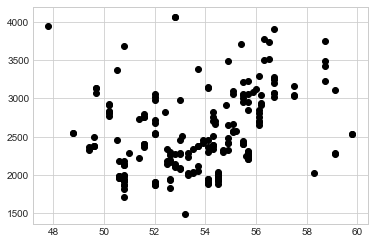

In [19]:
# draw dot plots to see linear relationship between response variable and explanatory variables separately
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# height vs. cw
plt.plot(df['height'], df['curb-weight'], 'o', color='black')

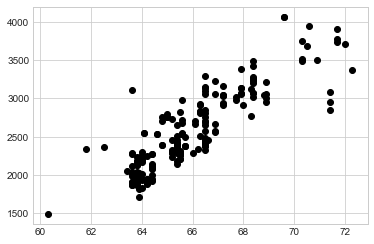

In [20]:
# width vs. cw
plt.plot(df['width'], df['curb-weight'], 'o', color='black')

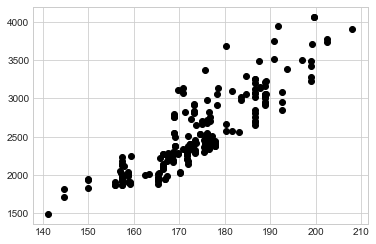

In [21]:
# length vs. cw
plt.plot(df['length'], df['curb-weight'], 'o', color='black')

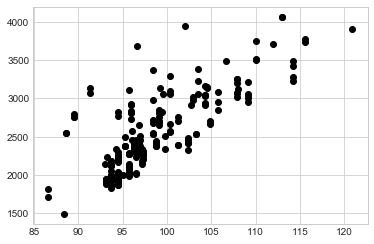

In [22]:
# wb vs. cw
plt.plot(df['wheel-base'], df['curb-weight'], 'o', color='black')

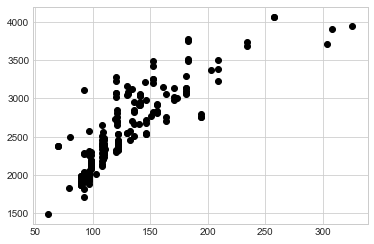

In [23]:
# es vs. cw
plt.plot(df['engine-size'], df['curb-weight'], 'o', color='black')

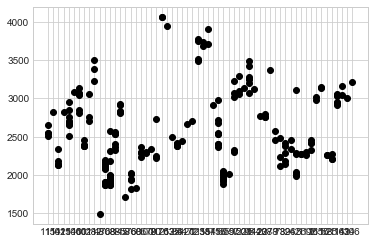

In [24]:
# horsepower vs. cw
plt.plot(df['horsepower'], df['curb-weight'], 'o', color='black')

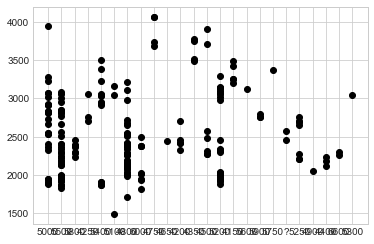

In [25]:
# prpm vs. cw
plt.plot(df['peak-rpm'], df['curb-weight'], 'o', color='black')

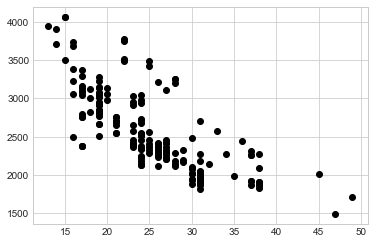

In [26]:
# cmpg vs. cw
plt.plot(df['city-mpg'], df['curb-weight'], 'o', color='black')

- From the dot plots above, we can see that some variables are preferred to be the explanatory variables in the later analysis as they have shown a stronger linear realtionship with the response variable. They are width, length, wheel-base, engine-size, and city-mpg.  

## Regression Model Construction & Evaluation
- Construct at least two different linear regression models that predict curb-weight based on the provided explanatory variables and evaluate them using K-fold cross validation. Each of your models must include at least three 3 explanatory variables. 
- According to the previous EDA work, the explanatory variables will be chosen among width, length, wheel-base, engine-size, and city-mpg.
- Separate the response variable for the model from the explanatory variables to be used for training the model. 

In [28]:
# make a copy of the original dataframe so that the original is preserved
X = df.copy()

# drop the curb-weight column from X so that the response variable is removed from the explanatory variables
X.drop('curb-weight', axis=1, inplace=True)
X.head()

,,,,,,,,,,wheel-base,...,engine-size,,,,,horsepower,peak-rpm,city-mpg,,
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Automated Data Splitting via scikit-learn

In [29]:
# split the data into training and testing subsets
# set aside 30% of the data for testing purposes
# specify a value for the inital random_state to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# check the results
len(X_train)

143

In [30]:
len(X_test)

62

In [31]:
# check the row indices of the new objects to see whether they match
y_test.head()

32     1837
6      2844
135    2758
124    2818
11     2395
Name: curb-weight, dtype: int64

In [32]:
X_test.head()

,,,,,,,,,,wheel-base,...,engine-size,,,,,horsepower,peak-rpm,city-mpg,,
32,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
135,2,104,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,15510
124,3,?,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925


In [33]:
X_train.head()

,,,,,,,,,,wheel-base,...,engine-size,,,,,horsepower,peak-rpm,city-mpg,,
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625
137,2,104,saab,gas,turbo,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68,4500,37,42,9495
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529


In [34]:
y_train.head()

204    3062
137    2847
45     1909
187    2319
33     1940
Name: curb-weight, dtype: int64

- The data set has successfully been split into training and testing subsets. 

### scikit-learn's Cross Validation Capabilities

In [ ]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

### Construct the first linear regression model

In [36]:
# create a new dataframe containing only the explanatory variables for the linear regression model
newX1_train = X_train[['width', 'length', 'engine-size']].copy()

# sanity check
newX1_train.head()

,width,length,engine-size
204,68.9,188.8,141
137,66.5,186.6,121
45,63.6,155.9,90
187,65.5,171.7,97
33,64.0,150.0,92


In [39]:
# assign the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores1 = cross_val_score(model, newX1_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of the linear regression model
print (scores1)

[0.93525102 0.92640828 0.90210011 0.88068827 0.78759106]


In [40]:
import numpy as np

# calculate the average R^2 across all 5 folds
np.mean(scores1)

0.8864077487002368

- The 5-fold cross validation shows that the first model has a cross validated R^2 of 88.6%. 

### Construct the second linear regression model

In [41]:
# create a new dataframe containing only the explanatory variables for the linear regression model
newX2_train = X_train[['width', 'wheel-base', 'city-mpg']].copy()

# sanity check
newX2_train.head()

,width,wheel-base,city-mpg
204,68.9,109.1,19
137,66.5,99.1,19
45,63.6,94.5,38
187,65.5,97.3,37
33,64.0,93.7,30


In [42]:
# assign the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores2 = cross_val_score(model, newX2_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of the linear regression model
print (scores2)

[0.89021501 0.87951867 0.83846618 0.87799481 0.77519365]


In [43]:
# calculate the average R^2 across all 5 folds
np.mean(scores2)

0.8522776638428834

- The 5-fold cross validation shows that the second model has a cross validated R^2 of 85.2%.

## Conclusions
The first model using width, length and engine-size as exploratory variables has a cross validated r-square of 88.6%, and the second model using width, wheel-base and city-mpg as exploratory variables has a corss validated r-square of 85.2%. Both are relatively high. 

Since the first model has a higher cross validated r-square value, I will say it is preferred. We can use width, length, and engine-size to predict the weight of a passenger vehicle. 